# Sistem Pengendali Pemanas Pemanggang Kopi Menggunakan Logika Fuzzy
---
Mesin pemanggang kopi merupakan sebuah mesin yang digunakan untuk menyangrai biji kopi agar matang, sehingga siap untuk di proses lebih lanjut. Proses pemanggangan (roasting) kopi sangat menentukan cita rasa kopi, sehingga dibutuhkan seorang operator yang ahli  di bidang ini. Maka dari itu kita akan membangun sebuah sistem pengendali pada pemanas pemanggang dengan logika fuzzy, sehingga proses roasting biji kopi dapat bekerja secara otomatis. 

## Mengimport Library
---
- Library **numpy** digunakan untuk komputasi data secara matematis
- Library **skfuzzy** digunakan untuk komputasi fuzzy logic
- Library **tabulate** digunakan untuk membuat table
- Library **matplotlib.pyplot** digunakan untuk plotting sebuah data (visualisasi grafik)

In [3]:
import numpy as np
import skfuzzy as fuzz
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline

## Fuzzyfikasi

### Nilai Lingustik
Nilai lingustik atau semesta pembicaraan adalah nilai keseluruhan yang diperbolehkan untuk dioperasikan dalam suatu variabel fuzzy, dan ada juga Domain fuzzy yang merupakan keseluruhan nilai yang diizinkan dalam semesta pembicaraan dan boleh dioperasikan dalam suatu himpunan fuzzy.

Dari tiga variabel yang digunakan, maka nilai linguistiknya sebagai berikut:

Nilai linguistik input:
1. Variabel **Warna** : **Hijau**, **Kuning**, **Agak Coklat**, **Coklat**, dan **Hitam**
2. Variabel **Temperatur** : **Dingin**, **Sedang**, **Agak Panas**, **Panas**, dan **Sangat Panas**

Nilai linguistik output:
3. Variabel  **Pemanas** : **Zero**, **Low**, **Middle**, **Large**, dan **Very Large**

### Input
|  Semesta pembicaraan  | Warna |  Domain Himpunan   |
|-----------------------|-------|--------------------|
|        [1,16]         | Hijau |        1-5       |
|        [1,16]         | Kuning |        2-8       |
|        [1,16]         | Agak Coklat  |        5-11       |
|        [1,16]         | Coklat  |        8-14      |
|        [1,16]         | Hitam  |        11-16       |

Warna Biji Kopi (Tingkat Kematangan)
- **Hijau** : 1-5
- **Kuning** : 2-8
- **Agak Coklat** : 5-11
- **Coklat** : 8-14
- **Hitam** : 11-16

|  Semesta pembicaraan  | Temp |  Domain Himpunan   |
|-----------------------|-------|--------------------|
|        [1,200]         | Dingin |        1-60       |
|        [1,200]         | Sedang |        20-100       |
|        [1,200]         | Agak Panas  |        60-140       |
|        [1,200]         | Panas  |        100-180      |
|        [1,200]         | Sangat Panas  |        140-200       |

Temperatur Ruang Sangrai (Celcius)
- **Dingin** : 1-60
- **Sedang** : 20-100
- **Agak Panas** : 60-140
- **Panas** : 100-180
- **Sangat Panas** : 140-200

### Output
|  Semesta pembicaraan  | Pemanas |  Domain Himpunan   |
|-----------------------|-------|--------------------|
|        [1,100]         | Zero |        1-25       |
|        [1,100]         | Low |        1-50       |
|        [1,100]         | Middle  |        25-751       |
|        [1,100]         | Large  |        50-100      |
|        [1,100]         | Very Large  |        75-100       |

Pemanas (% dari nilai maksimum)
- **Zero** : 1-25
- **Low** : 1-50
- **Middle** : 25-75
- **Large** : 50-100
- **Very Large** : 75-100

## Inisiasi Range Variabel dari Setiap Input dan Output

In [4]:
warna = np.arange(1,16,1)
temp = np.arange(1,200,1)
pemanas = np.arange(1,100,1)

## Fungsi Keanggotaan
Pada fuzzy terdapat beberapa fungsi keanggotaan, yang bisa direpresentasikan dalam beberapa format, salah satunya adalah kurva Trapesium dan segitiga.
Karena kita akan menggunakan kurva segitiga, dan Trapesium , maka fungsi yang akan digunakan adalah `fuzz.trimf` dan juga `fuzz.trapmf`. Format Kurva segitiga adalah `[batas awal, titik puncak, batas akhir]`. Perintahnya adalah:
`variabely = fuzz.trimf(variabelx, [batas awal, titik puncak, batas akhir])`
sedangkan format kurva trapesium adalah `[titik a,b,c dan d]`.perintahnya adalah :
`variabely = fuzz.trapmf(variabelx, [titik a,b,c, dan d])`

### Persamaan Fungsi Keanggotaan Warna Biji Kopi

$Warna[Hijau] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \leq 2 \\
       {5-x \over 5-2} & \mbox{; } 2 < x < 5 \\
       0 & \mbox{; } x \geq 5
    \end{array}
\right.$ 

$Warna [Kuning] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 2 atau x \geq 8 \\
       {x-2 \over 5-2} & \mbox{; } 2 < x < 5 \\
       {8-x \over 8-5} & \mbox{; } 5 \leq x < 8
    \end{array}
\right.$

$Warna [AgakCoklat] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 5 atau x \geq 11 \\
       {x-5 \over 8-5} & \mbox{; } 5 < x < 8 \\
       {11-x \over 11-8} & \mbox{; } 8 \leq x < 11
    \end{array}
\right.$

$Warna [Coklat] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 8 atau x \geq 14 \\
       {x-8 \over 11-8} & \mbox{; } 8 < x < 11 \\
       {14-x \over 14-11} & \mbox{; } 11 \leq x < 14
    \end{array}
\right.$

$Warna [Hitam] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 11 \\
       {x-11 \over 14-11} & \mbox{; } 11 < x < 14 \\
       1 & \mbox{; } x \geq 14
    \end{array}
\right.$

### Persamaan Fungsi Keanggotaan Temperature Ruang Sangrai

$Temp [Dingin] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \leq 20 \\
       {60-x \over 60-20} & \mbox{; } 20 < x < 60 \\
       0 & \mbox{; } x \geq 60
    \end{array}
\right.$ 

$Temp [Sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 20 atau x \geq 100 \\
       {x-20 \over 60-20} & \mbox{; } 20 < x < 60 \\
       {100-x \over 100-60} & \mbox{; } 60 \leq x < 100
    \end{array}
\right.$

$Temp [AgakPanas] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 60 atau x \geq 140 \\
       {x-60 \over 100-60} & \mbox{; } 60 < x < 100 \\
       {140-x \over 140-100} & \mbox{; } 100 \leq x < 140
    \end{array}
\right.$

$Temp [Panas] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 100 atau x \geq 180 \\
       {x-100 \over 140-100} & \mbox{; } 100 < x < 140 \\
       {180-x \over 180-140} & \mbox{; } 140 \leq x < 180
    \end{array}
\right.$

$Temp [SangatPanas] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 140 \\
       {x-140 \over 180-140} & \mbox{; } 140 < x < 180 \\
       1 & \mbox{; } x \geq 180
    \end{array}
\right.$

### Persamaan Fungsi Keanggotaan Pemanas

$Pemanas [Zero] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 25 \\
       {25-x \over 25 -0} & \mbox{; } 0 < x < 25 \\
    \end{array}
\right.$ 

$Pemanas [Low] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 0 atau x \geq 50 \\
       {x-0 \over 25-0} & \mbox{; } 0 < x < 25 \\
       {50-x \over 50-25} & \mbox{; } 25 \leq x < 50
    \end{array}
\right.$

$Pemanas [Middle] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 25 atau x \geq 75 \\
       {x-25 \over 50-25} & \mbox{; } 25 < x < 50 \\
       {75-x \over 75-50} & \mbox{; } 50 \leq x < 75
    \end{array}
\right.$

$Pemanas [Large] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 50 atau x \geq 100 \\
       {x-50 \over 75-50} & \mbox{; } 50 < x < 75 \\
       {100-x \over 100-75} & \mbox{; } 75 \leq x < 100
    \end{array}
\right.$

$Pemanas [VeryLarge] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 75 \\
       {x-75 \over 100-75} & \mbox{; } 75 < x < 100 \\
    \end{array}
\right.$

### Fungsi Keanggotaan Warna Biji Kopi

In [5]:
warna_hijau = fuzz.trapmf(warna, [1, 1, 2, 5])
warna_kuning = fuzz.trimf(warna, [2, 5, 8])
warna_agakcoklat = fuzz.trimf(warna, [5,8,11])
warna_coklat = fuzz.trimf(warna, [8,11,14])
warna_hitam = fuzz.trapmf(warna, [11,14,16,16])

### Fungsi Keanggotaan Temperatur Ruang Sangrai

In [6]:
temp_dingin = fuzz.trapmf(temp, [1, 1, 20, 60])
temp_sedang = fuzz.trimf(temp, [20, 60, 100])
temp_agakpanas = fuzz.trimf(temp, [60, 100, 140])
temp_panas = fuzz.trimf(temp, [100, 140, 180])
temp_sangatpanas = fuzz.trapmf(temp, [140, 180, 200, 200])

### Fungsi Keanggotaan Pemanas

In [7]:
pemanas_zero = fuzz.trimf(pemanas, [1, 1, 25])
pemanas_low = fuzz.trimf(pemanas, [1, 25, 50])
pemanas_middle = fuzz.trimf(pemanas, [25, 50, 75])
pemanas_large = fuzz.trimf(pemanas, [50, 75, 100])
pemanas_verylarge = fuzz.trimf(pemanas, [75, 100, 100])

### Visualisasi Dari Fungsi Keanggotaan

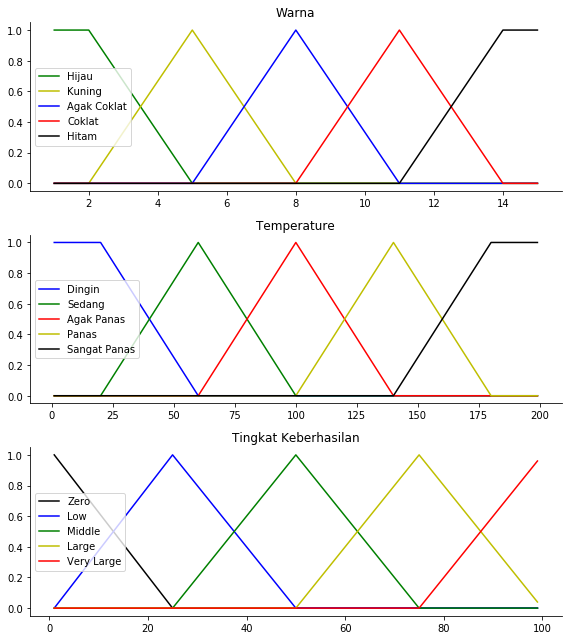

In [8]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(warna, warna_hijau, 'g', linewidth=1.5, label='Hijau')
ax0.plot(warna, warna_kuning, 'y', linewidth=1.5, label='Kuning')
ax0.plot(warna, warna_agakcoklat, 'b', linewidth=1.5, label='Agak Coklat')
ax0.plot(warna, warna_coklat, 'r', linewidth=1.5, label='Coklat')
ax0.plot(warna, warna_hitam, 'k', linewidth=1.5, label='Hitam')
ax0.set_title('Warna')
ax0.legend(loc = 'center left')

ax1.plot(temp, temp_dingin, 'b', linewidth=1.5, label='Dingin')
ax1.plot(temp, temp_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(temp, temp_agakpanas, 'r', linewidth=1.5, label='Agak Panas')
ax1.plot(temp, temp_panas, 'y', linewidth=1.5, label='Panas')
ax1.plot(temp, temp_sangatpanas, 'k', linewidth=1.5, label='Sangat Panas')
ax1.set_title('Temperature')
ax1.legend(loc = 'center left')

ax2.plot(pemanas, pemanas_zero, 'k', linewidth=1.5, label='Zero')
ax2.plot(pemanas, pemanas_low, 'b', linewidth=1.5, label='Low')
ax2.plot(pemanas, pemanas_middle, 'g', linewidth=1.5, label='Middle')
ax2.plot(pemanas, pemanas_large, 'y', linewidth=1.5, label='Large')
ax2.plot(pemanas, pemanas_verylarge, 'r', linewidth=1.5, label='Very Large')
ax2.set_title('Tingkat Keberhasilan')
ax2.legend(loc = 'center left')

#Turn on/off right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

### Rules Table
---
Dibawah ini adalah table dari aturan-aturan fuzzy yang dibuat menggunakan library tabulate.
Note: VL = Very Large, LG = Large, MD = Middle, LW = Low, ZR = Zero.

In [9]:
rule = np.array([['Dingin', 'VL', 'VL', 'LG', 'MD', 'ZR'],
              ['Sedang', 'VL', 'VL', 'LG', 'MD', 'ZR'],
              ['Agak Panas', 'VL', 'VL', 'LG', 'LW', 'ZR'],
              ['Panas', 'VL', 'LG', 'MD', 'LW', 'ZR'],
              ['Sangat Panas', 'VL', 'LG', 'MD', 'ZR', 'ZR']])
headers = ["        Warna\nTemperature", "Hijau", "Kuning", "Agak Coklat", "Coklat", "Hitam"]

# tabulate data
table = tabulate(rule, headers, tablefmt="fancy_grid")

# output
print(table)

╒═════════════════╤═════════╤══════════╤═══════════════╤══════════╤═════════╕
│         Warna   │ Hijau   │ Kuning   │ Agak Coklat   │ Coklat   │ Hitam   │
│ Temperature     │         │          │               │          │         │
╞═════════════════╪═════════╪══════════╪═══════════════╪══════════╪═════════╡
│ Dingin          │ VL      │ VL       │ LG            │ MD       │ ZR      │
├─────────────────┼─────────┼──────────┼───────────────┼──────────┼─────────┤
│ Sedang          │ VL      │ VL       │ LG            │ MD       │ ZR      │
├─────────────────┼─────────┼──────────┼───────────────┼──────────┼─────────┤
│ Agak Panas      │ VL      │ VL       │ LG            │ LW       │ ZR      │
├─────────────────┼─────────┼──────────┼───────────────┼──────────┼─────────┤
│ Panas           │ VL      │ LG       │ MD            │ LW       │ ZR      │
├─────────────────┼─────────┼──────────┼───────────────┼──────────┼─────────┤
│ Sangat Panas    │ VL      │ LG       │ MD            │ ZR     

| No | Input Warna | Input Temperatur | Output  Pemanas | 
|----|----------------|----------------------|---------------------------|
| 1  |   Hijau        |   Dingin             |   <span style='background :Red' > Very Large </span>        | 
| 2  |   Hijau       |   Sedang             |   <span style='background :Red' > Very Large </span>           | 
| 3  |   Hijau        |   Agak Panas             |   <span style='background :Red' > Very Large </span>        | 
| 4  |   Hijau        |   Panas             |   <span style='background :Red' > Very Large  </span>           |  
| 5  |   Hijau       |   Sangat Panas             |   <span style='background :Red' > Very Large  </span>            | 
| 6  |   Kuning        |   Dingin             |   <span style='background :Red' > Very Large  </span>            | 
| 7  |   Kuning        |   Sedang              |   <span style='background :Red' > Very Large </span>           | 
| 8  |   Kuning       |   Agak Panas              |  <span style='background :Red' > Very Large </span>          | 
| 9  |   Kuning        |   Panas              |   <span style='background :orange' > Large </span>        |
| 10  |   Kuning        |   Sangat Panas              |   <span style='background :orange' > Large </span>        |
| 11  |   Agak Coklat        |   Dingin              |   <span style='background :orange' > Large </span>        |
| 12  |   Agak Coklat        |   Sedang              |   <span style='background :orange' > Large </span>        |
| 13  |   Agak Coklat        |   Agak Panas              |   <span style='background :orange' > Large </span>        |
| 14  |   Agak Coklat        |   Panas              |   <span style='background :yellow;' > Middle </span>        |
| 15  |   Agak Coklat        |   Sangat Panas              |   <span style='background :yellow' > Middle </span>        |
| 16  |   Coklat        |   Dingin              |   <span style='background :yellow' > Middle </span>        |
| 17  |   Coklat        |   Sedang              |   <span style='background :yellow' > Middle </span>        |
| 18  |   Coklat        |   Agak Panas              |   <span style='background :green' > Low </span>        |
| 19  |   Coklat        |   Panas              |   <span style='background :green' > Low </span>        |
| 20  |   Coklat        |   Sangat Panas              |   <span style='background :blue; color :white' > Zero </span>        |
| 21  |   Hitam        |   Dingin              |   <span style='background :blue; color :white' > Zero </span>        |
| 22  |   Hitam        |   Sedang              |   <span style='background :blue; color :white' > Zero </span>        |
| 23  |   Hitam        |   Agak Panas              |   <span style='background :blue; color :white' > Zero </span>        |
| 24  |   Hitam        |   Panas              |   <span style='background :blue; color :white' > Zero </span>        |
| 25  |   Hitam        |   Sangat Panas              |   <span style='background :blue; color :white' > Zero </span>        |

## Contoh Kasus
---
### Berapa Suhu Pemanas, jika warna biji kopi berada di tingkat 12 dan temperatur di tungku sangrai 150°C?


## Menghitung Derajat Keanggotaan
### Perhitungan Komputasi

In [10]:
warna_level_hijau = fuzz.interp_membership(warna, warna_hijau, 12)
warna_level_kuning = fuzz.interp_membership(warna, warna_kuning, 12)
warna_level_agakcoklat = fuzz.interp_membership(warna, warna_agakcoklat, 12)
warna_level_coklat = fuzz.interp_membership(warna, warna_coklat, 12)
warna_level_hitam = fuzz.interp_membership(warna, warna_hitam, 12)

temp_level_dingin = fuzz.interp_membership(temp, temp_dingin, 150)
temp_level_sedang = fuzz.interp_membership(temp, temp_sedang, 150)
temp_level_agakpanas = fuzz.interp_membership(temp, temp_agakpanas, 150)
temp_level_panas = fuzz.interp_membership(temp, temp_panas, 150)
temp_level_sangatpanas = fuzz.interp_membership(temp, temp_sangatpanas, 150)

print("Derajat Keanggotaan Nilai Warna")
print(warna_level_hijau)
print(warna_level_kuning)
print(warna_level_agakcoklat)
print(warna_level_coklat)
print(warna_level_hitam)
print("")
print("Derajat Keanggotaan Nilai Variabel")
print(temp_level_dingin)
print(temp_level_sedang)
print(temp_level_agakpanas)
print(temp_level_panas)
print(temp_level_sangatpanas)

Derajat Keanggotaan Nilai Warna
0.0
0.0
0.0
0.6666666666666666
0.3333333333333333

Derajat Keanggotaan Nilai Variabel
0.0
0.0
0.0
0.75
0.25


### Perhitungan Manual

Derajat Keanggotaan Variabel Warna
- $Warna[Hijau] = 0 $

- $Warna [Kuning] = 0 $

- $Warna [AgakCoklat] = 0 $

- $Warna [Coklat] = 
\left\{
    \begin{array}{ll}
       {14-12 \over 14-11} & \mbox{; } 11 \leq 12 < 14
    \end{array}
\right.$

- $Warna [Coklat] >> 
\begin{array}{ll}
       {2 \over 3} & \mbox{= }
    \end{array}0.6666666666666667 $

- $Warna [Hitam] = 
\left\{
    \begin{array}{ll}
       {12-11 \over 14-11} & \mbox{; } 11 < 12 < 14 \\
    \end{array}
\right.$

- $Warna [Hitam] >>
\begin{array}{ll}
       {1 \over 3} & \mbox{= }
    \end{array}0.3333333333333333‬ $
    
Derajat Keanggotaan Variabel Temperatur
- $Temp [Dingin] = 0 $

- $Temp [Sedang] = 0 $

- $Temp [AgakPanas] = 0 $

- $Temp [Panas] = 
\left\{
    \begin{array}{ll}
       {180-150 \over 180-140} & \mbox{; } 140 \leq 150 < 180
    \end{array}
\right.$

- $Temp [Panas] >>
\begin{array}{ll}
       {30 \over 40} & \mbox{= }
    \end{array}0.75‬ $

- $Temp [SangatPanas] = 
\left\{
    \begin{array}{ll}
       {150-140 \over 180-140} & \mbox{; } 140 < 150 < 180 \\
    \end{array}
\right.$

- $Temp [SangatPanas] >>
\begin{array}{ll}
       {10 \over 40} & \mbox{= }
    \end{array}0.25‬ $

## Menentukan Fungsi Implikasi berdasarkan RULES
---
Pada metode mamdani ini, fungsi implikasi yang digunakan adalah minimum (karena menggunakan operator AND pada RULES nya), oleh karena itu kita menggunakan np.fmin. Cara Manual mencari fungsi implikasi yaitu dengan mengikuti kaidah rulenya (misalnya pada kasus ini, pada rule 1, mencari nilai minimum dari fungsi keanggotaan dari warna_level_hijau dan temp_level_dingin, dan seterusnya sampai rule yang terakhir).

In [11]:
rule1 = np.fmin(warna_level_hijau, temp_level_dingin)
rule2 = np.fmin(warna_level_hijau, temp_level_sedang)
rule3 = np.fmin(warna_level_hijau, temp_level_agakpanas)
rule4 = np.fmin(warna_level_hijau, temp_level_panas)
rule5 = np.fmin(warna_level_hijau, temp_level_sangatpanas)

rule6 = np.fmin(warna_level_kuning, temp_level_dingin)
rule7 = np.fmin(warna_level_kuning, temp_level_sedang)
rule8 = np.fmin(warna_level_kuning, temp_level_agakpanas)
rule9 = np.fmin(warna_level_kuning, temp_level_panas)
rule10 = np.fmin(warna_level_kuning, temp_level_sangatpanas)

rule11 = np.fmin(warna_level_agakcoklat, temp_level_dingin)
rule12 = np.fmin(warna_level_agakcoklat, temp_level_sedang)
rule13 = np.fmin(warna_level_agakcoklat, temp_level_agakpanas)
rule14 = np.fmin(warna_level_agakcoklat, temp_level_panas)
rule15 = np.fmin(warna_level_agakcoklat, temp_level_sangatpanas)

rule16 = np.fmin(warna_level_coklat, temp_level_dingin)
rule17 = np.fmin(warna_level_coklat, temp_level_sedang)
rule18 = np.fmin(warna_level_coklat, temp_level_agakpanas)
rule19 = np.fmin(warna_level_coklat, temp_level_panas)
rule20 = np.fmin(warna_level_coklat, temp_level_sangatpanas)

rule21 = np.fmin(warna_level_hitam, temp_level_dingin)
rule22 = np.fmin(warna_level_hitam, temp_level_sedang)
rule23 = np.fmin(warna_level_hitam, temp_level_agakpanas)
rule24 = np.fmin(warna_level_hitam, temp_level_panas)
rule25 = np.fmin(warna_level_hitam, temp_level_sangatpanas)

print("Rule 1: ", rule1)
print("Rule 2: ", rule2)
print("Rule 3: ", rule3)
print("Rule 4: ", rule4)
print("Rule 5: ", rule5)
print("Rule 6: ", rule6)
print("Rule 7: ", rule7)
print("Rule 8: ", rule8)
print("Rule 9: ", rule9)
print("Rule 10: ", rule10)
print("Rule 11: ", rule11)
print("Rule 12: ", rule12)
print("Rule 13: ", rule13)
print("Rule 14: ", rule14)
print("Rule 15: ", rule15)
print("Rule 16: ", rule16)
print("Rule 17: ", rule17)
print("Rule 18: ", rule18)
print("Rule 19: ", rule19)
print("Rule 20: ", rule20)
print("Rule 21: ", rule21)
print("Rule 22: ", rule22)
print("Rule 23: ", rule23)
print("Rule 24: ", rule24)
print("Rule 25: ", rule25)

Rule 1:  0.0
Rule 2:  0.0
Rule 3:  0.0
Rule 4:  0.0
Rule 5:  0.0
Rule 6:  0.0
Rule 7:  0.0
Rule 8:  0.0
Rule 9:  0.0
Rule 10:  0.0
Rule 11:  0.0
Rule 12:  0.0
Rule 13:  0.0
Rule 14:  0.0
Rule 15:  0.0
Rule 16:  0.0
Rule 17:  0.0
Rule 18:  0.0
Rule 19:  0.6666666666666666
Rule 20:  0.25
Rule 21:  0.0
Rule 22:  0.0
Rule 23:  0.0
Rule 24:  0.3333333333333333
Rule 25:  0.25


### Membuat Variabel baru untuk mendeklarasikan hasil RULEnya serta membuat visualisasi plotnya dan juga menampilkan hasil dari Derajat Keanggotaan yang telah dicari tadi.

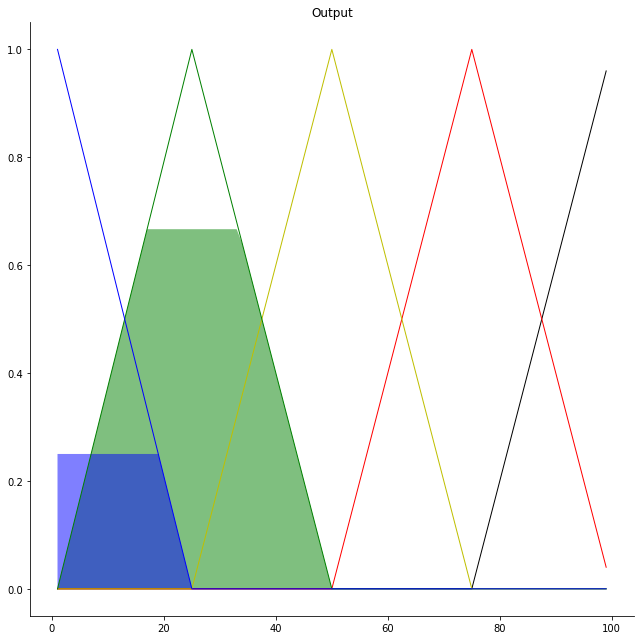

In [12]:
#Deklarasi hasil RULE
pemanas_level_zero = np.fmin(rule20, pemanas_zero)
pemanas_level_zero = np.fmin(rule21, pemanas_zero)
pemanas_level_zero = np.fmin(rule22, pemanas_zero)
pemanas_level_zero = np.fmin(rule23, pemanas_zero)
pemanas_level_zero = np.fmin(rule24, pemanas_zero)
pemanas_level_zero = np.fmin(rule25, pemanas_zero)

pemanas_level_low = np.fmin(rule18, pemanas_low)
pemanas_level_low = np.fmin(rule19, pemanas_low)

pemanas_level_middle = np.fmin(rule14, pemanas_middle)
pemanas_level_middle = np.fmin(rule15, pemanas_middle)
pemanas_level_middle = np.fmin(rule16, pemanas_middle)
pemanas_level_middle = np.fmin(rule17, pemanas_middle)

pemanas_level_large = np.fmin(rule9, pemanas_large)
pemanas_level_large = np.fmin(rule10, pemanas_large)
pemanas_level_large = np.fmin(rule11, pemanas_large)
pemanas_level_large = np.fmin(rule12, pemanas_large)
pemanas_level_large = np.fmin(rule13, pemanas_large)

pemanas_level_verylarge= np.fmin(rule1, pemanas_verylarge)
pemanas_level_verylarge= np.fmin(rule2, pemanas_verylarge)
pemanas_level_verylarge= np.fmin(rule3, pemanas_verylarge)
pemanas_level_verylarge= np.fmin(rule4, pemanas_verylarge)
pemanas_level_verylarge= np.fmin(rule5, pemanas_verylarge)
pemanas_level_verylarge= np.fmin(rule6, pemanas_verylarge)
pemanas_level_verylarge= np.fmin(rule7, pemanas_verylarge)
pemanas_level_verylarge= np.fmin(rule8, pemanas_verylarge)
pemanas0 = np.zeros_like(pemanas)

#Visualisasi
fig, ax0 = plt.subplots(figsize=(9,9))

ax0.fill_between(pemanas, pemanas0, pemanas_level_verylarge, facecolor='k', alpha=0.5)
ax0.plot(pemanas, pemanas_verylarge, 'k', linewidth=1, linestyle='-', )
ax0.fill_between(pemanas, pemanas0, pemanas_level_large, facecolor='r', alpha=0.5)
ax0.plot(pemanas, pemanas_large, 'r', linewidth=1, linestyle='-')
ax0.fill_between(pemanas, pemanas0, pemanas_level_middle, facecolor='y', alpha=0.5)
ax0.plot(pemanas, pemanas_middle, 'y', linewidth=1, linestyle='-')
ax0.fill_between(pemanas, pemanas0, pemanas_level_low, facecolor='g', alpha=0.5)
ax0.plot(pemanas, pemanas_low, 'g', linewidth=1, linestyle='-')
ax0.fill_between(pemanas, pemanas0, pemanas_level_zero, facecolor='b', alpha=0.5)
ax0.plot(pemanas, pemanas_zero, 'b', linewidth=1, linestyle='-')
ax0.set_title("Output")


##Turn on/off right axes
for ax in (ax0, ):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()


## Mencari Bobot nilai max dari Derajat Keanggotaan Outputnya

In [13]:
cariBobot = np.fmax(pemanas_level_zero,pemanas_level_low, np.fmax(pemanas_level_middle, pemanas_level_large, pemanas_level_verylarge))

## Defuzzifikasi
---
Menghitung Defuzifikasi dengan Metode Mean Of Maximum (MOM)

Input dari proses defuzzy adalah suatu himpunan fuzzy yang diperoleh dari komposisi aturan-aturan
fuzzy,sedangkan output yang dihasilkan merupakan suatu bilangan pada domain himpunan fuzzy
tersebut. Sehingga jika diberikan suatu himpunan fuzzy dengan range tertentu, maka harus dapat diambil
suatu nilai crisp tertentu sebagai output. Ada beberapa metode defuzzy yang biasa digunakan pada
komposisi aturan mamdani, yaitu centroid, bisektor, mean of maximum, largest of maximum dan
smallest of maximum.

Pada  metode Mean OF Maximum ini, solusi crisp diperoleh dengan cara mengambil nilai rata-rata domain yang memiliki nilai keanggotaan maksimum.

$\begin{align*}
\mathbf{z} = \frac {a + b} {2}
\end{align*}$

99
Bobot [0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
 0.5        0.54166667 0.58333333 0.625      0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.64       0.6        0.56
 0.52       0.48       0.44       0.4        0.36       0.32
 0.28       0.24       0.2        0.16       0.12       0.08
 0.04       0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.    

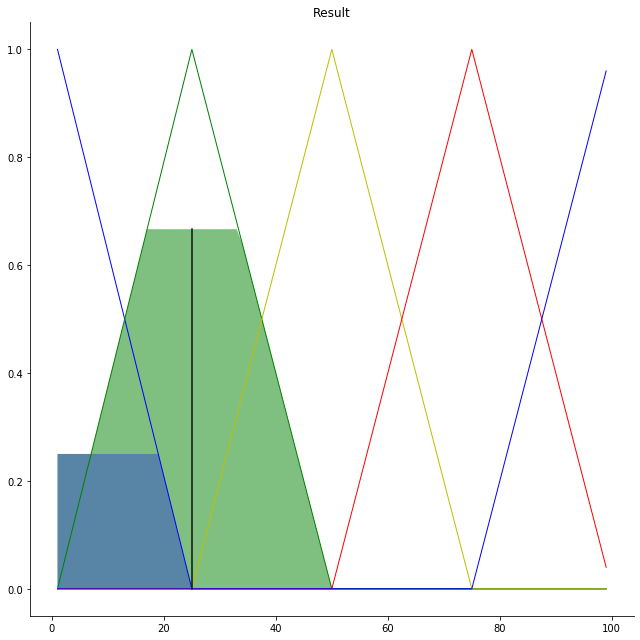

In [14]:
print(len(cariBobot))
tingkat_pemanas = fuzz.defuzz(pemanas, cariBobot, 'mom')
pemanas_activation = fuzz.interp_membership(pemanas, cariBobot, tingkat_pemanas)

#Visualisasi
fig, ax0 = plt.subplots(figsize=(9,9))

ax0.plot(pemanas, pemanas_zero, 'b', linewidth=1, linestyle='-', )
ax0.plot(pemanas, pemanas_low, 'g', linewidth=1, linestyle='-', )
ax0.plot(pemanas, pemanas_middle, 'y', linewidth=1, linestyle='-', )
ax0.plot(pemanas, pemanas_large, 'r', linewidth=1, linestyle='-')
ax0.plot(pemanas, pemanas_verylarge, 'b', linewidth=1, linestyle='-')
ax0.fill_between(pemanas, pemanas0, cariBobot, facecolor='g', alpha=0.5)
ax0.fill_between(pemanas, pemanas0, pemanas_level_zero, facecolor='b', alpha=0.3)
ax0.plot((tingkat_pemanas, tingkat_pemanas), (0, pemanas_activation),'k', linewidth=1.5, alpha=0.9)
ax0.set_title("Result")

##Turn on/off right axes
for ax in (ax0, ):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()
print("Bobot", cariBobot)

### Hasil perhitungan Komputasi Defuzzifikasi

In [15]:
tingkat_pemanas

25.0

### Perhitungan Manual Defuzzifikasi
---
-  $ Mean Of Maximum(MOM) =
    \begin{array}{ll}
    {a+b\over 2}
    \end{array}$
    $=
   \begin{array}{ll}
   {17+33 \over 2}
   \end{array}$
   $=
   \begin{array}{ll}
   {50 \over 2}
   \end{array}$
   $ = 25 $
   
- a didapatkan dari sumbu x pada nilai maksimum pertama.
- b didapatkan dari sumbu x pada nilai maksimum sebelum nilai nya menurun

**Jika Warna biji kopi berada di tingkat 12 dan Temperatur di tungku sangrai 150°C** menghasilkan **Pemanas** bernilai **LOW = 25**